# 데이터 분석하기

In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

In [2]:
DATA_IN_PATH = './data_in/'
print("파일 크기 : ")
for file in os.listdir(DATA_IN_PATH):
    if 'csv' in file :
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

파일 크기 : 
1cha_dataset.csv              0.51MB
clean_dataset.csv             1.52MB
test_dataset.csv              0.37MB


# 데이터전처리

In [3]:
# import numpy as np
# import pandas as pd
# import re
# import json
# from konlpy.tag import Okt
# from tensorflow.python.keras.preprocessing.sequence import pad_sequences
# from tensorflow.python.keras.preprocessing.text import Tokenizer

In [25]:
import warnings
import pandas as pd
warnings.filterwarnings(action='ignore')
DATA_IN_PATH = './data_in/'

In [26]:
df = pd.read_csv(DATA_IN_PATH+'clean_dataset.csv', names=['Sentence','Label'])
df.head()

,Sentence,Label
0,개같은 소리 하지마,1
1,좌배 까는건 ㅇㅂ,1
2,개소리야 니가 빨갱이를 옹호하고 드루킹을 ㅇㅇ짓이라고 말못해서 삐진거야 빨갱아,1
3,애새끼가 초딩도 아니고 ㅋㅋㅋㅋ,1
4,731부대의 후예라 그런지 가학적인 아이디어는 세계최고임 이래서 애교만 떨어도 돈 ...,1


In [27]:
print('전체 학습데이터의 개수: {}'.format(len(df)))

전체 학습데이터의 개수: 16488


In [28]:
train_length = df['Sentence'].astype(str).apply(len)
train_length.head()

0     10
1      9
2     43
3     17
4    106
Name: Sentence, dtype: int64

Text(0, 0.5, 'Number of Sentence')

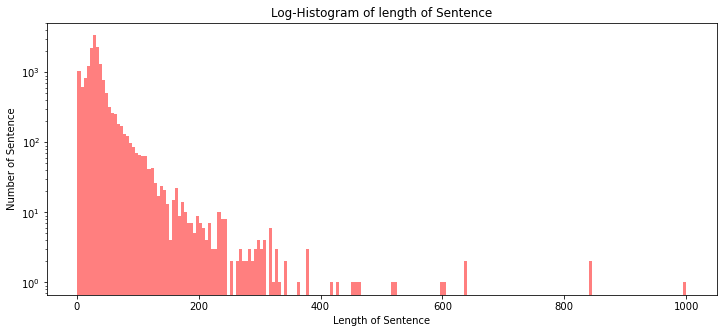

In [29]:
# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_length, bins=200, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonposy='clip')
# 그래프 제목
plt.title('Log-Histogram of length of Sentence')
# 그래프 x 축 라벨
plt.xlabel('Length of Sentence')
# 그래프 y 축 라벨
plt.ylabel('Number of Sentence')

In [30]:
print('문장 길이 최대 값: {}'.format(np.max(train_length)))
print('문장 길이 최소 값: {}'.format(np.min(train_length)))
print('문장 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('문장 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('문장 길이 중간 값: {}'.format(np.median(train_length)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('문장 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('문장 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))

문장 길이 최대 값: 1000
문장 길이 최소 값: 1
문장 길이 평균 값: 35.47
문장 길이 표준편차: 35.02
문장 길이 중간 값: 29.0
문장 길이 제 1 사분위: 22.0
문장 길이 제 3 사분위: 38.0


{'whiskers': [<matplotlib.lines.Line2D at 0x28bd69aa4f0>,
 'caps': [<matplotlib.lines.Line2D at 0x28bd69aabb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x28bd69aa190>],
 'medians': [<matplotlib.lines.Line2D at 0x28bd69b32b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x28bd69b3910>],
 'means': [<matplotlib.lines.Line2D at 0x28bd69b35b0>]}

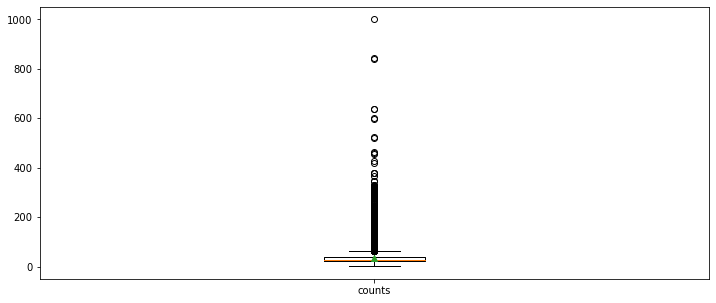

In [31]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot(train_length,
             labels=['counts'],
             showmeans=True)

In [32]:
train_st= [st for st in df['Sentence'] if type(st) is str]
wordclud = WordCloud(font_path = DATA_IN_PATH + 'NanumGothic.ttf').generate(' '.join(train_st))

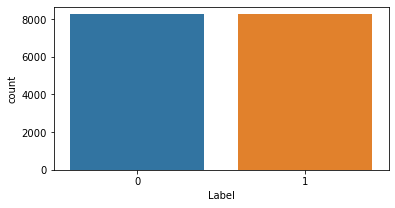

In [33]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(df['Label'])

In [34]:
print("긍정 리뷰 개수: {}".format(df['Label'].value_counts()[0]))
print("부정 리뷰 개수: {}".format(df['Label'].value_counts()[1]))

긍정 리뷰 개수: 8244
부정 리뷰 개수: 8244


# 데이터 전처리_책version

In [24]:
import numpy as np
import pandas as pd
import re
import json
from konlpy.tag import Okt
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer

In [35]:
df = pd.read_csv(DATA_IN_PATH+'clean_dataset.csv', names=['Sentence','Label'])
df.head()

,Sentence,Label
0,개같은 소리 하지마,1
1,좌배 까는건 ㅇㅂ,1
2,개소리야 니가 빨갱이를 옹호하고 드루킹을 ㅇㅇ짓이라고 말못해서 삐진거야 빨갱아,1
3,애새끼가 초딩도 아니고 ㅋㅋㅋㅋ,1
4,731부대의 후예라 그런지 가학적인 아이디어는 세계최고임 이래서 애교만 떨어도 돈 ...,1


In [38]:
sentence_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]", "", df['Sentence'][2]) 
print(sentence_text)

개소리야 니가 빨갱이를 옹호하고 드루킹을 ㅇㅇ짓이라고 말못해서 삐진거야 빨갱아


In [39]:
okt=Okt()
sentence_text = okt.morphs(sentence_text, stem=True)
print(sentence_text)

['개', '소리', '야', '니', '가', '빨갱이', '를', '옹호', '하고', '드루', '킹', '을', 'ㅇㅇ', '짓', '이라고', '말', '못', '하다', '삐지다', '빨갱', '아']


In [40]:
stop_words = set(['은', '는', '이', '가', '하', '아', '것', '들','의', '있', '되', '수', '보', '주', '등', '한'])
clean_sentence = [token for token in sentence_text if not token in stop_words]
print(clean_sentence)

['개', '소리', '야', '니', '빨갱이', '를', '옹호', '하고', '드루', '킹', '을', 'ㅇㅇ', '짓', '이라고', '말', '못', '하다', '삐지다', '빨갱']


In [41]:
def preprocessing(sentence, okt, remove_stopwords = False, stop_words = []):
    # 함수의 인자는 다음과 같다.
    # sentence : 전처리할 텍스트
    # okt : okt 객체를 반복적으로 생성하지 않고 미리 생성후 인자로 받는다.
    # remove_stopword : 불용어를 제거할지 선택 기본값은 False
    # stop_word : 불용어 사전은 사용자가 직접 입력해야함 기본값은 비어있는 리스트
    
    # 1. 한글 및 공백을 제외한 문자 모두 제거.
    sentence_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]", "", sentence)
    
    # 2. okt 객체를 활용해서 형태소 단위로 나눈다.
    wd_sentence = okt.morphs(sentence_text, stem=True)
    
    if remove_stopwords:
        
        # 불용어 제거(선택적)
        wd_sentence = [token for token in wd_sentence if not token in stop_words]
        
   
    return wd_sentence

In [42]:
stop_words = [ '은', '는', '이', '가', '하', '아', '것', '들','의', '있', '되', '수', '보', '주', '등', '한']
okt = Okt()
clean_train_sentence = []

for review in df['Sentence']:
    # 비어있는 데이터에서 멈추지 않도록 string인 경우만 진행
    if type(review) == str:
        clean_train_sentence.append(preprocessing(review, okt, remove_stopwords = True, stop_words=stop_words))
    else:
        clean_train_sentence.append([])  #string이 아니면 비어있는 값 추가

In [43]:
test_data = pd.read_csv(DATA_IN_PATH + 'clean_dataset.csv', names=['Sentence','Label'] )

clean_test_sentence = []

for review in test_data['Sentence']:
    # 비어있는 데이터에서 멈추지 않도록 string인 경우만 진행
    if type(review) == str:
        clean_test_sentence.append(preprocessing(review, okt, remove_stopwords = True, stop_words=stop_words))
    else:
        clean_test_sentence.append([])  #string이 아니면 비어있는 값 추가

In [44]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_sentence)
train_sequences = tokenizer.texts_to_sequences(clean_train_sentence)
test_sequences = tokenizer.texts_to_sequences(clean_test_sentence)

word_vocab = tokenizer.word_index # 단어 사전 형태
word_vocab["<PAD>"] = 0

In [45]:
MAX_SEQUENCE_LENGTH = 8 # 문장 최대 길이

train_inputs = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post') # 학습 데이터를 벡터화
train_labels = np.array(df['Label']) # 학습 데이터의 라벨

test_inputs = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post') # 테스트 데이터를 벡터화
test_labels = np.array(test_data['Label']) # 테스트 데이터의 라벨

In [46]:
DATA_IN_PATH = './data_in/'
TRAIN_INPUT_DATA = 'nsmc_train_input.npy'
TRAIN_LABEL_DATA = 'nsmc_train_label.npy'
TEST_INPUT_DATA = 'nsmc_test_input.npy'
TEST_LABEL_DATA = 'nsmc_test_label.npy'
DATA_CONFIGS = 'data_configs.json'

data_configs = {}

data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab) # vocab size 추가

import os
# 저장하는 디렉토리가 존재하지 않으면 생성
if not os.path.exists(DATA_IN_PATH):
    os.makedirs(DATA_IN_PATH)

# 전처리 된 학습 데이터를 넘파이 형태로 저장
np.save(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'wb'), train_inputs)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'wb'), train_labels)
# 전처리 된 테스트 데이터를 넘파이 형태로 저장
np.save(open(DATA_IN_PATH + TEST_INPUT_DATA, 'wb'), test_inputs)
np.save(open(DATA_IN_PATH + TEST_LABEL_DATA, 'wb'), test_labels)

# 데이터 사전을 json 형태로 저장
json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'), ensure_ascii=False)

# 데이터 분할

In [31]:
X = df['Sentence']
Y = df['Label']

1. 백터화
TFIDF
CountVectorizer 줄여서 CV

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

vec_cv = CountVectorizer(analyzer = "word", max_features = 6000) 

X_cv = vec_cv.fit_transform(X)

In [35]:
X_cv.shape

(5825, 6000)

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec_tf = TfidfVectorizer(min_df = 0.0, analyzer = 'char', sublinear_tf=True, 
    ngram_range = (1,3), max_features=6000)


X_tf = vec_tf.fit_transform(X)

In [40]:
X_tf.shape

(5825, 6000)

In [41]:
vec_tf.get_feature_names()

[' ',
 ' "',
 " '",
 ' (',
 ' ,',
 ' , ',
 ' -',
 ' .',
 ' . ',
 ' ..',
 ' 1',
 ' 10',
 ' 15',
 ' 16',
 ' 17',
 ' 18',
 ' 19',
 ' 1년',
 ' 1위',
 ' 2',
 ' 20',
 ' 3',
 ' 30',
 ' 4',
 ' 40',
 ' 5',
 ' 50',
 ' 6',
 ' 7',
 ' 7등',
 ' 8',
 ' 9',
 ' :',
 ' : ',
 ' =',
 ' = ',
 ' ?',
 ' ? ',
 ' ^',
 ' a',
 ' c',
 ' d',
 ' f',
 ' i',
 ' k',
 ' n',
 ' p',
 ' s',
 ' t',
 ' v',
 ' w',
 ' ~',
 ' ㄱ',
 ' ㄷ',
 ' ㄷㄷ',
 ' ㄹ',
 ' ㄹㅇ',
 ' ㅁ',
 ' ㅁㅈ',
 ' ㅂ',
 ' ㅂㄷ',
 ' ㅂㅅ',
 ' ㅅ',
 ' ㅅㄱ',
 ' ㅅㅂ',
 ' ㅅㅌ',
 ' ㅆ',
 ' ㅆㅅ',
 ' ㅇ',
 ' ㅇㅂ',
 ' ㅇㅇ',
 ' ㅇㅈ',
 ' ㅈ',
 ' ㅈㄴ',
 ' ㅉ',
 ' ㅉㅉ',
 ' ㅋ',
 ' ㅋ ',
 ' ㅋㅋ',
 ' ㅎ',
 ' ㅎㅎ',
 ' ㅠ',
 ' ㅠㅠ',
 ' ㅡ',
 ' ㅡㅡ',
 ' 가',
 ' 가 ',
 ' 가격',
 ' 가끔',
 ' 가는',
 ' 가능',
 ' 가르',
 ' 가서',
 ' 가입',
 ' 가장',
 ' 가져',
 ' 가족',
 ' 가지',
 ' 가치',
 ' 각',
 ' 간',
 ' 간다',
 ' 갈',
 ' 감',
 ' 갑',
 ' 갔',
 ' 강',
 ' 강간',
 ' 강사',
 ' 갖',
 ' 갖고',
 ' 같',
 ' 같다',
 ' 같은',
 ' 같음',
 ' 같이',
 ' 개',
 ' 개 ',
 ' 개꿀',
 ' 개돼',
 ' 개병',
 ' 개새',
 ' 개소',
 ' 개씹',
 ' 개인',
 ' 개좆',
 ' 걍',
 ' 걍 ',
 ' 걔',
 ' 거',
 ' 거 ',
 ' 거기',
 ' 거리'